In [25]:
import numpy as np
import pandas as pd
data = pd.read_excel(r"D:\Data Science\Module-10-Marketing & Retail Analytics\Project-10\Sales_Data.xlsx")

In [26]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [27]:
data.describe(include='object').T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


In [28]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count , 5))
    else:
        plt.figure(figsize=(n , 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']


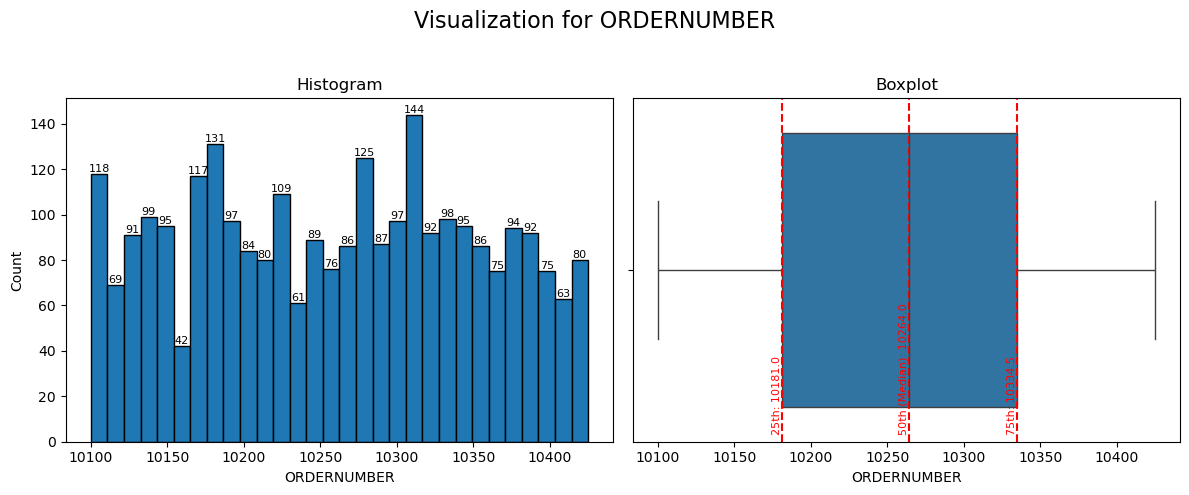

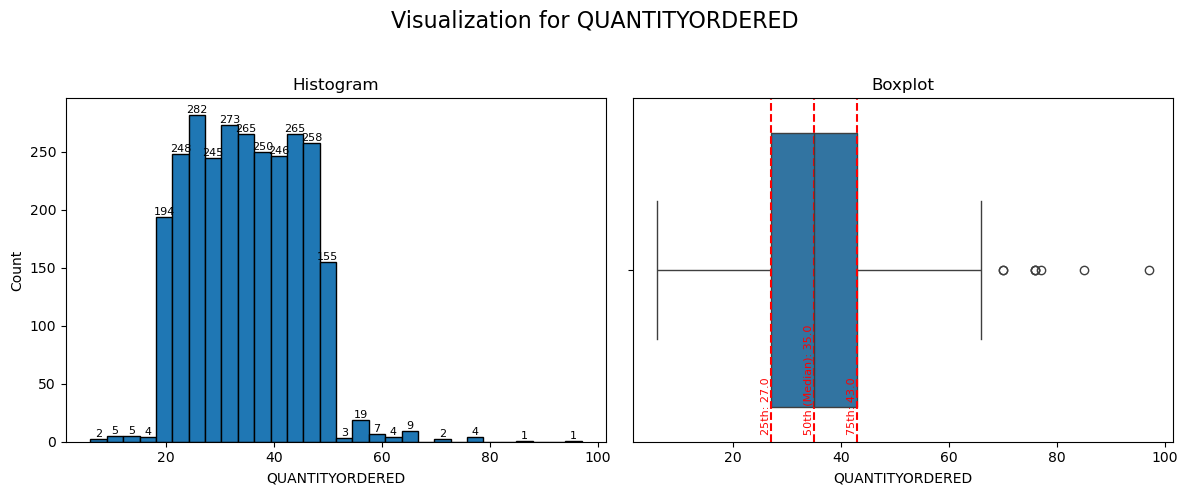

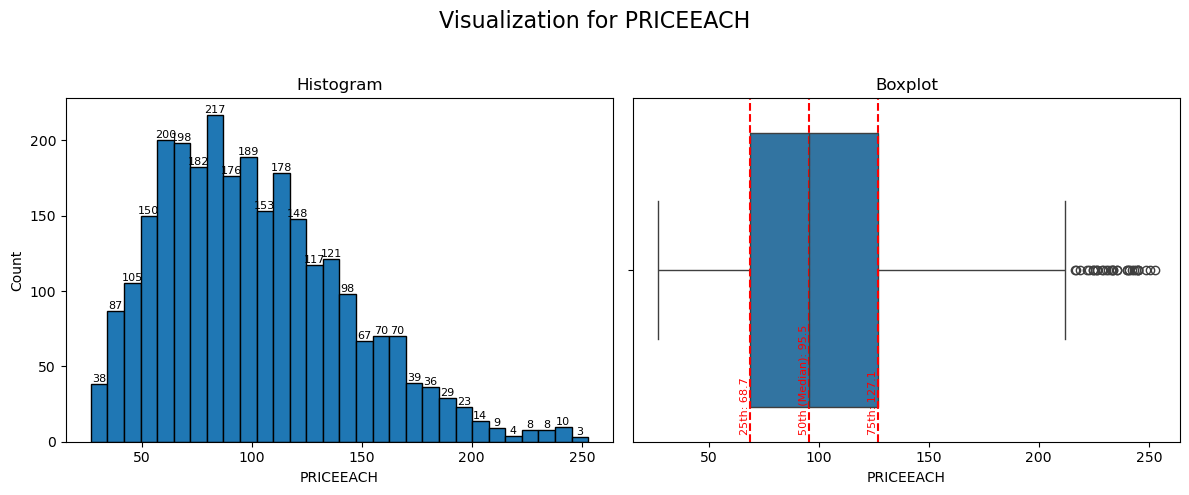

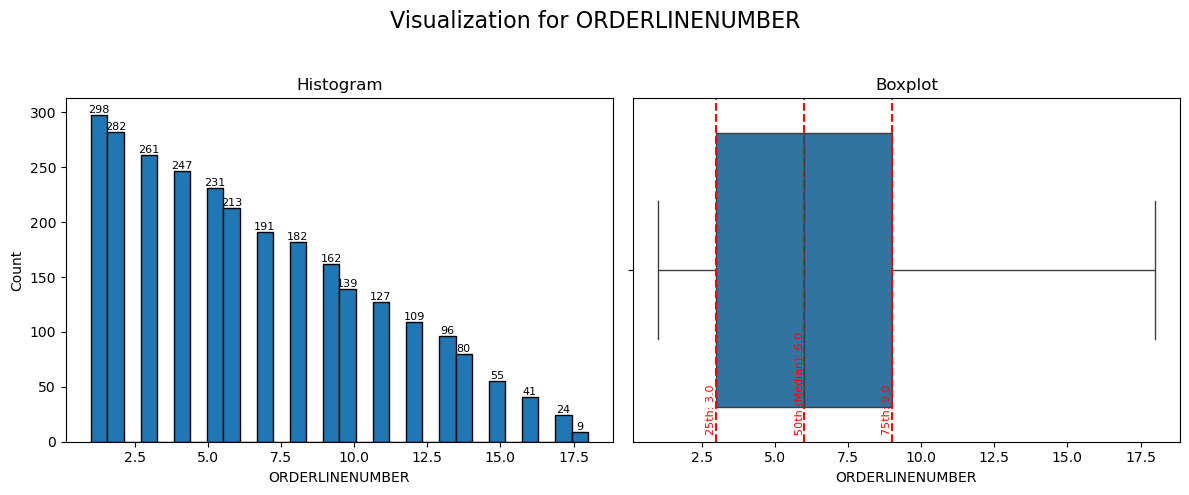

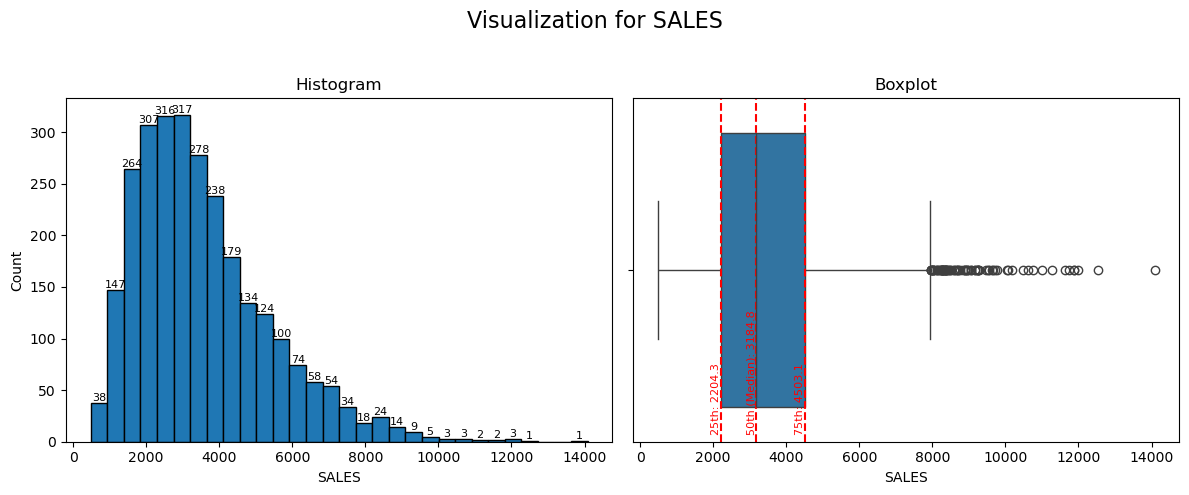

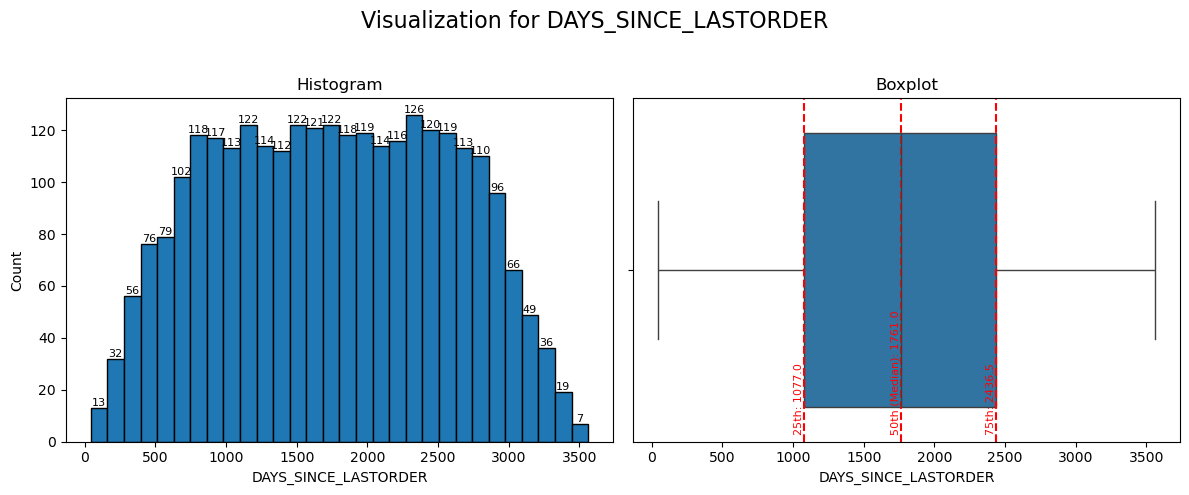

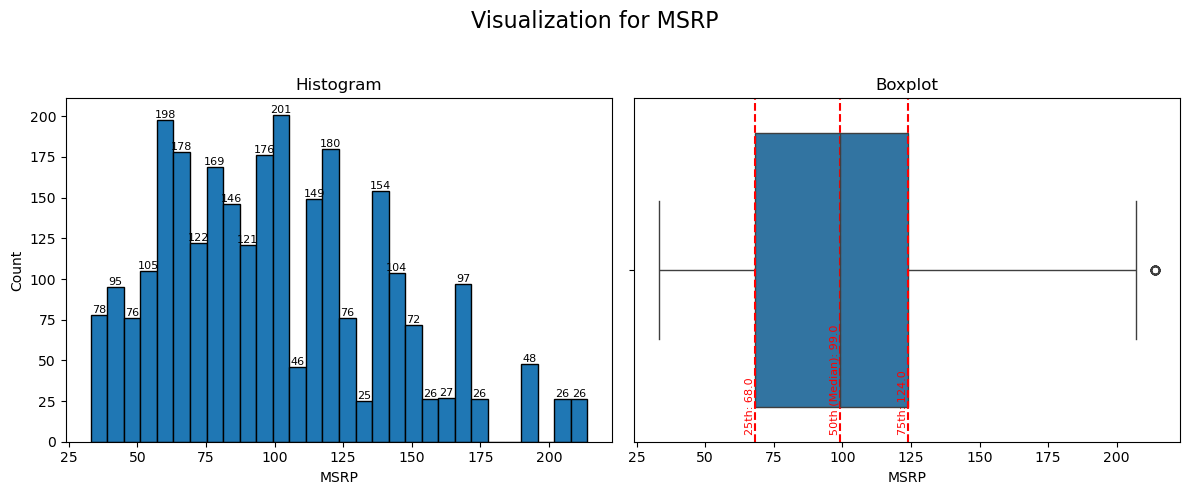

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
num_cols = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in data.columns if data[col].dtype in ['object', 'category']]
print(cat_cols,num_cols,sep='\n')
       # Use f-string for dynamic filename
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Visualization for {col}", fontsize=16)

    # Histogram with labels
    counts, bins, patches = ax[0].hist(data[col].dropna(), bins=30, edgecolor='black')
    ax[0].set_title("Histogram")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Count")

    for count, patch in zip(counts, patches):
        if count > 0:
            ax[0].text(patch.get_x() + patch.get_width() / 2, count, int(count),
                       ha='center', va='bottom', fontsize=8)

    # Boxplot with percentiles
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[1].set_title("Boxplot")
    
    # Calculate percentiles
    q25 = data[col].quantile(0.25)
    q50 = data[col].quantile(0.50)
    q75 = data[col].quantile(0.75)

    for q, label in zip([q25, q50, q75], ['25th', '50th (Median)', '75th']):
        ax[1].axvline(q, color='red', linestyle='--')
        ax[1].text(q, 0.02, f'{label}: {q:.1f}', transform=ax[1].get_xaxis_transform(),
                   color='red', fontsize=8, rotation=90, verticalalignment='bottom', ha='right')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'D:/Data Science/Module-10-Marketing & Retail Analytics/Project-10/Images/2_{col}.jpg')
    plt.show()
    plt.close()
